## 예제 : 미국 주 데이터를 이용한 join

In [5]:
import pandas as pd
abbrevs = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
pop = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')

print(abbrevs.head())
print(areas.head())
print(pop.head())

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0


In [41]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AK,total,1990,553290.0,Alaska,AK
1,AK,under18,1990,177502.0,Alaska,AK
2,AK,total,1992,588736.0,Alaska,AK
3,AK,under18,1991,182180.0,Alaska,AK
4,AK,under18,1992,184878.0,Alaska,AK
...,...,...,...,...,...,...
2539,WY,under18,1993,137458.0,Wyoming,WY
2540,WY,total,1991,459260.0,Wyoming,WY
2541,WY,under18,1991,136720.0,Wyoming,WY
2542,WY,under18,1990,136078.0,Wyoming,WY


In [48]:
merged = merged.drop('abbreviation', axis=1)
merged

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska
...,...,...,...,...,...
2539,WY,under18,1993,137458.0,Wyoming
2540,WY,total,1991,459260.0,Wyoming
2541,WY,under18,1991,136720.0,Wyoming
2542,WY,under18,1990,136078.0,Wyoming


In [49]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [50]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,Puerto Rico
1873,PR,total,1990,NaN,Puerto Rico
1874,PR,total,1991,NaN,Puerto Rico
1875,PR,under18,1991,NaN,Puerto Rico
1876,PR,total,1993,NaN,Puerto Rico


In [51]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array([], dtype=object)

In [52]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

In [53]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [59]:
final = pd.merge(merged,areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [61]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [66]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [69]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,656425.0
51,AL,total,2010,4785570.0,Alabama,52423.0
141,AR,total,2010,2922280.0,Arkansas,53182.0
149,AZ,total,2010,6408790.0,Arizona,114006.0
197,CA,total,2010,37333601.0,California,163707.0


## 예제2 : GroupBy

In [80]:
df = pd.DataFrame({'key':['A','B','C','A','B','C'],'data' : range(6)}, columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [78]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [84]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import seaborn as planets
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [91]:
planets.groupby('method')

In [93]:
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [100]:
planets.groupby(['method']).aggregate({'orbital_period':'mean', 'number':'sum'})

,orbital_period,number
method,,
Astrometry,631.180000,2
Eclipse Timing Variations,4751.644444,15
Imaging,118247.737500,50
Microlensing,3153.571429,27
Orbital Brightness Modulation,0.709307,5
Pulsar Timing,7343.021201,11
Pulsation Timing Variations,1170.000000,1
Radial Velocity,823.354680,952
Transit,21.102073,776


In [103]:
planets.groupby(['method']).filter(lambda x: x['number'].sum() > 20)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [106]:
planets.groupby(['method'])['distance'].transform(lambda x:x - x.mean())

0        25.799792
1         5.349792
2       -31.760208
3        59.019792
4        67.869792
           ...    
1030   -427.298080
1031   -451.298080
1032   -425.298080
1033   -306.298080
1034   -339.298080
Name: distance, Length: 1035, dtype: float64

## 예제 3 : 출생률 데이터

In [108]:
births = pd.read_csv('data/births.csv')

In [110]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [167]:
births['decade'] = 10 * (births['year'] // 10)

In [114]:
births.pivot_table('births', index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births of per year')

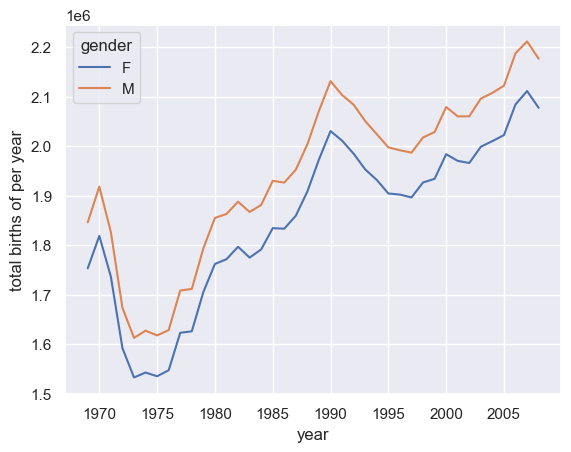

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births of per year')

In [150]:
# 견고한 시그마 클리핑 연산
# 99일 / 6월 31일 같은 이상치 제거
import numpy as np
quartiles = np.percentile(births['births'],[25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # 가우스 분포의 사분위 수에서 표본 평균의 견고한 추정치
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [151]:
births['day'] = births['day'].astype(int)

In [155]:
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

C:\Users\user\AppData\Local\Temp\ipykernel_12016\902299334.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'mean births by day')

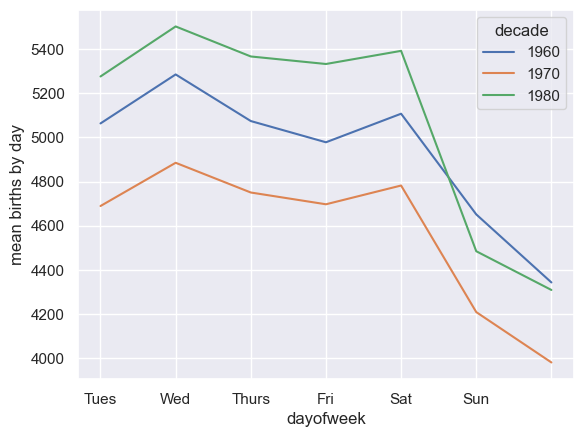

In [159]:
births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [170]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic_df.groupby(['sex','class'], observed=True)['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 시계열 다루기

#### 파이썬 날짜/시간 라이브러리
+ datetime
+ dateutil

In [177]:
from dateutil import parser
date = parser.parse("25th of Jan, 2021")
date, date.strftime('%A')

(datetime.datetime(2021, 1, 25, 0, 0), 'Monday')

In [211]:
from datetime import datetime
date=datetime(year=2021, month=7, day=4, hour=13)
date

datetime.datetime(2021, 7, 4, 13, 0)

#### 타입이 지정된 Numpy 시간배열
+ datetime64

In [185]:
import numpy as np
date = np.array('2021-01-25',dtype=np.datetime64)
date

array('2021-01-25', dtype='datetime64[D]')

In [189]:
# 벡터화 연산을 통한 빠른 처리가 가능
date+np.arange(12)

array(['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
       '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
       '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05'],
      dtype='datetime64[D]')

#### Numpy와 Python의 시계열 라이브러리를 합친 Pandas

In [193]:
import pandas as pd
date = pd.to_datetime("4th of july, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [195]:
date.strftime('%A')

'Sunday'

In [214]:
date + pd.to_timedelta(np.arange(12), 'D') 

DatetimeIndex(['2021-07-04 13:00:00', '2021-07-05 13:00:00',
               '2021-07-06 13:00:00', '2021-07-07 13:00:00',
               '2021-07-08 13:00:00', '2021-07-09 13:00:00',
               '2021-07-10 13:00:00', '2021-07-11 13:00:00',
               '2021-07-12 13:00:00', '2021-07-13 13:00:00',
               '2021-07-14 13:00:00', '2021-07-15 13:00:00'],
              dtype='datetime64[ns]', freq=None)

In [204]:
index = pd.DatetimeIndex(['2020-07-04','2020-08-04','2021-07-04','2021-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [206]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [208]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

#### Pandas 시계열 라이브러리
+ 타임스탬프 (Timestamp) - Python의 datetime 대체 타입이지만 numpy의 datetime64 기반
    + 인덱스 - DatetimeIndex
+ 기간 (Period) - numpy의 datetime64 기반으로 고정 주파수 간격을 인코딩
    + 인덱스 - PeriodIndex
+ 시간 델타 (Timedelta) - python의 datetime.timedelta 대체 타입이지만 numpy의 timedelta64 기반
    + 인덱스 - TimedeltaIndex

In [225]:
# 단일 날짜를 to_datetime으로 생성시 -> timestamp 생성
# 여러 날짜를 to_datetime으로 생성시 -> DatetimeIndex 생성
dates = pd.to_datetime([datetime.now(),'20240701','07-01-2024','2024-jul-1'])
dates

DatetimeIndex(['2024-07-01 16:39:42.409254',        '2024-07-01 00:00:00',
                      '2024-07-01 00:00:00',        '2024-07-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [232]:
pd.date_range('2024-07-01', '2024-07-10')

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
               '2024-07-09', '2024-07-10'],
              dtype='datetime64[ns]', freq='D')

In [234]:
pd.date_range('2024-07-01', periods=8)

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08'],
              dtype='datetime64[ns]', freq='D')

In [260]:
pd.date_range('2024-07-01', periods=8, freq='h') # 시간별 (hour)

DatetimeIndex(['2024-07-01 00:00:00', '2024-07-01 01:00:00',
               '2024-07-01 02:00:00', '2024-07-01 03:00:00',
               '2024-07-01 04:00:00', '2024-07-01 05:00:00',
               '2024-07-01 06:00:00', '2024-07-01 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [264]:
pd.date_range('2024-07-01', periods=8, freq='2h30min') # 2시간 30분 간격

DatetimeIndex(['2024-07-01 00:00:00', '2024-07-01 02:30:00',
               '2024-07-01 05:00:00', '2024-07-01 07:30:00',
               '2024-07-01 10:00:00', '2024-07-01 12:30:00',
               '2024-07-01 15:00:00', '2024-07-01 17:30:00'],
              dtype='datetime64[ns]', freq='150min')

In [237]:
pd.date_range('2024-07-01', periods=8, freq='b') # 휴일,공휴일을 제외 (business day)

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10'],
              dtype='datetime64[ns]', freq='B')

In [240]:
pd.date_range(start='2024', end='2025')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', length=367, freq='D')

In [256]:
randate = pd.DataFrame(np.random.randn(365, 4),
             index=pd.date_range(start='2024-07-01', end = '2025-06-30'),columns=['s1','s2','s3','s4'])
randate

,s1,s2,s3,s4
2024-07-01,-0.589536,-0.053965,-0.913912,0.796449
2024-07-02,2.023269,0.578155,0.549123,0.246655
2024-07-03,-0.966245,0.517700,0.614380,1.009643
2024-07-04,0.139575,0.226845,-0.504778,-0.355831
2024-07-05,-1.178174,1.108277,-0.284938,-0.142463
...,...,...,...,...
2025-06-26,0.131151,-0.060038,-1.210382,-0.582140
2025-06-27,0.308584,-0.805254,1.572437,-0.099563
2025-06-28,-0.117226,0.371036,0.039173,0.076306
2025-06-29,1.367334,2.527596,0.732554,0.158161


In [257]:
# loc를 이용한 슬라이싱
randate.loc['2024-07':'2024-08']

,s1,s2,s3,s4
2024-07-01,-0.589536,-0.053965,-0.913912,0.796449
2024-07-02,2.023269,0.578155,0.549123,0.246655
2024-07-03,-0.966245,0.517700,0.614380,1.009643
2024-07-04,0.139575,0.226845,-0.504778,-0.355831
2024-07-05,-1.178174,1.108277,-0.284938,-0.142463
...,...,...,...,...
2024-08-27,-0.704700,-0.129625,0.548625,-0.246130
2024-08-28,1.107595,0.299005,-1.178710,0.433369
2024-08-29,-1.280821,-1.548349,0.265868,-0.944958
2024-08-30,0.312246,0.172088,-0.430775,0.466256


In [258]:
# Month 이후의 값은 버리기
randate.index.to_period('M')

PeriodIndex(['2024-07', '2024-07', '2024-07', '2024-07', '2024-07', '2024-07',
             '2024-07', '2024-07', '2024-07', '2024-07',
             ...
             '2025-06', '2025-06', '2025-06', '2025-06', '2025-06', '2025-06',
             '2025-06', '2025-06', '2025-06', '2025-06'],
            dtype='period[M]', length=365)

In [259]:
randate.index - randate.index[0]

TimedeltaIndex([  '0 days',   '1 days',   '2 days',   '3 days',   '4 days',
                  '5 days',   '6 days',   '7 days',   '8 days',   '9 days',
                ...
                '355 days', '356 days', '357 days', '358 days', '359 days',
                '360 days', '361 days', '362 days', '363 days', '364 days'],
               dtype='timedelta64[ns]', length=365, freq='D')

### Pandas 시계열 리샘플링, 시프팅, 윈도잉 연습

In [289]:
# 야후 파이낸스 라이브러리 설치
#pip install yfinance

import yfinance as yf

ticker = 'NVDA'
sp500 = yf.download(ticker, start="2020-01-01", end="2024-06-30")

def create_sequences(data, seq_length, predict_steps):
    sequences = []
    for i in range(len(data) - seq_length - predict_steps + 1):
        seq = data[i:i + seq_length]
        label = data[i + seq_length:i + seq_length + predict_steps]
        sequences.append((seq, label))
    return sequences
seq_length = 30
predict_steps = 5

data = sp500['Close'].values
sequences = create_sequences(data, seq_length, predict_steps)

[*********************100%%**********************]  1 of 1 completed


In [290]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973633,237536000
2020-01-03,5.87750,5.94575,5.85250,5.90175,5.878018,205384000
2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902670,262636000
2020-01-07,5.95500,6.04425,5.90975,5.99825,5.974131,314856000
2020-01-08,5.99400,6.05100,5.95375,6.00950,5.985335,277108000


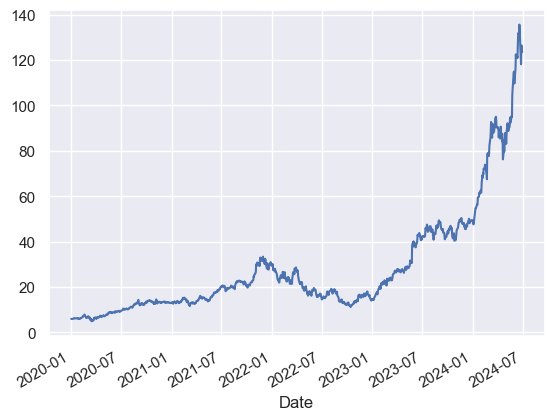

In [350]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
sp500=sp500['Close'] # 종가만 사용
sp500.plot();

#### resample()과 asfreq()의 차이점
+ resample은 데이터를 집계
+ asfreq는 데이터를 선택

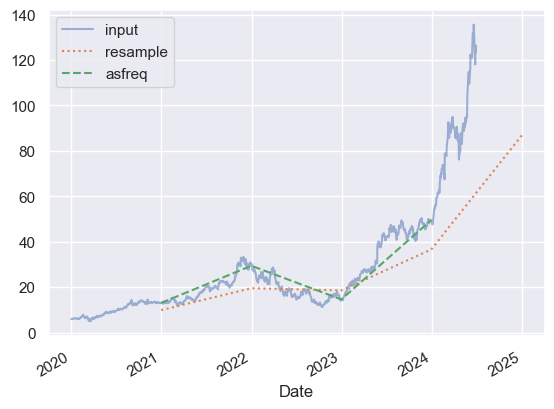

In [351]:
sp500.plot(alpha=0.5, style='-')
sp500.resample('BYE').mean().plot(style=':')    # 연(BYE) 평균수치(mean) (리샘플링)
sp500.asfreq('BYE').plot(style='--')            # 연말 주가
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

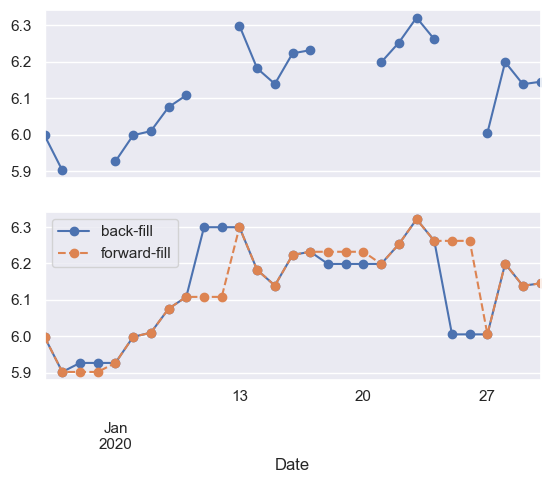

In [297]:
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')
# 영업일 데이터를 일별 주기로 리샘플링
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') #역방향 보간법 (back fill)
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') #순방향 보간법 (forward fill)
ax[1].legend(["back-fill", "forward-fill"])

### 시애틀 자전거 수 시각화

In [374]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()


C:\Users\user\AppData\Local\Temp\ipykernel_12016\3746132092.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [375]:
data.columns = ['Total', 'East', 'West']
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

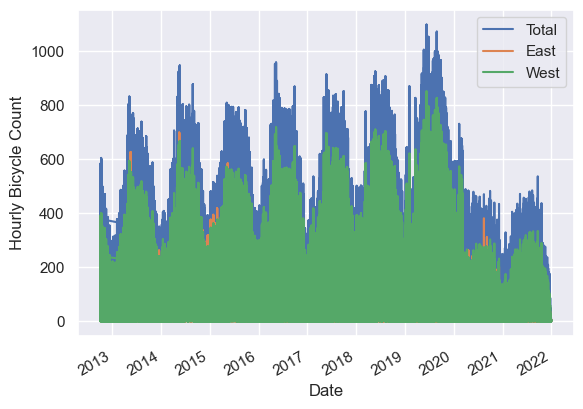

In [376]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

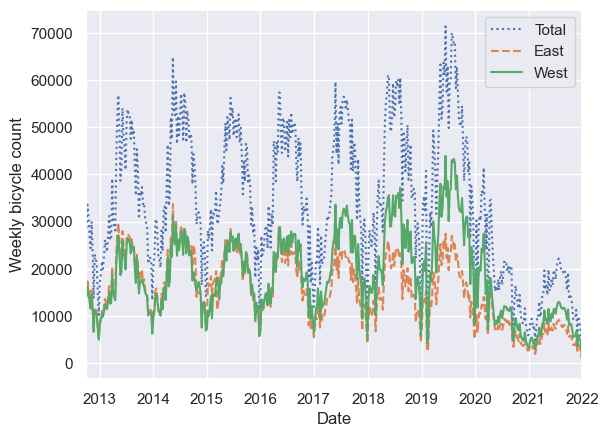

In [378]:
# 주 단위로 리샘플링

weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

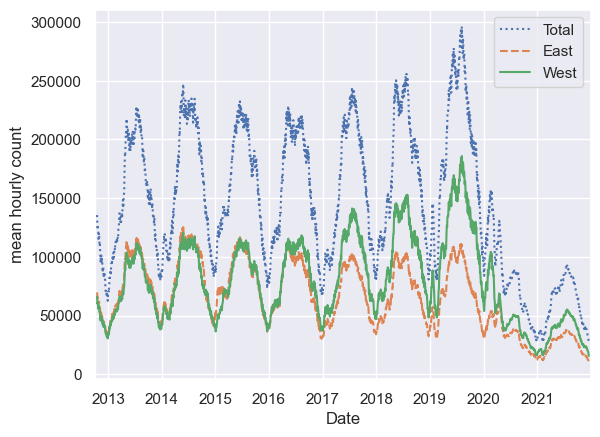

In [380]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

In [387]:
daily.groupby(daily.index.time).mean()

,Total,East,West
00:00:00,4811.472905,2183.65798,2627.814924
